In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
import nltk
import random
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import keras,os
# from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers
# from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from sklearn import datasets # load dataset
from sklearn.model_selection import train_test_split # split dataset
from sklearn.preprocessing import StandardScaler # standard scaler 
from sklearn.metrics import accuracy_score # check accuracy

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sathvikjammula/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sathvikjammula/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sathvikjammula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_excel('classification new1.xlsx')
df.head()

,Id,Judgment,Domain,Judgment Status,Equivalent Citation,Judgment Name,Court,Label
0,1,""" Being aggrieved by the judgment delivered on...",Civil,Appeal dismissed,CIVIL APPEAL NO. 3880 OF 2003,RAJASTHAN R.S.S. & GINNING MILLS FED.LTD Vs. D...,Supreme Court,0
1,2,"""This was an appeal from a judgment and decree...",Civil,Appeal dismissed,"1950 AIR, 7 1950 SCR 64",Messrs. Khimji Poonja And Company vs Shri Bald...,Supreme Court,0
2,3,"""This was an application under article 32 (1) ...",Civil,Petition allowed,"1950 AIR 163, 1950 SCR 566","Rashid Ahmed vs The Municipal Board, Kairana.T...",Supreme Court,0
3,4,"""APPEAL from a judgment of the High Court of H...",Civil,Appeal allowed,"1953 AIR 413, 1950 SCR 747",Supreme Court Of India ... vs Kadar Unnisa Beg...,Supreme Court,0
4,5,"""APPEAL under article 374(4) of the Constituti...",Civil,Appeal allowed,"1950 AIR 274, 1950 SCR 741",Supreme Court Of India ... vs Nandlal on 12 O...,Supreme Court,0


In [3]:
import pandas as pd

# count the number of occurrences of each label
label_counts = df['Label'].value_counts()

# determine the label with the fewest occurrences
min_count = label_counts.min()

# create an empty dataframe to hold the balanced dataset
balanced_df = pd.DataFrame()

# loop through each label
for label in label_counts.index:

    # get all entries with this label
    label_df = df[df['Label'] == label]

    # duplicate entries to match the number of the minority class
    duplicates_df = label_df.sample(n=min_count, replace=True)

    # concatenate the original and duplicated entries
    balanced_df = pd.concat([balanced_df, label_df, duplicates_df])

# save the balanced dataset
balanced_df.to_excel('balanced_dataset.xlsx', index=False)

In [4]:
data = pd.read_excel('balanced_dataset.xlsx')

In [5]:
data.head()

,Id,Judgment,Domain,Judgment Status,Equivalent Citation,Judgment Name,Court,Label
0,1,""" Being aggrieved by the judgment delivered on...",Civil,Appeal dismissed,CIVIL APPEAL NO. 3880 OF 2003,RAJASTHAN R.S.S. & GINNING MILLS FED.LTD Vs. D...,Supreme Court,0
1,2,"""This was an appeal from a judgment and decree...",Civil,Appeal dismissed,"1950 AIR, 7 1950 SCR 64",Messrs. Khimji Poonja And Company vs Shri Bald...,Supreme Court,0
2,3,"""This was an application under article 32 (1) ...",Civil,Petition allowed,"1950 AIR 163, 1950 SCR 566","Rashid Ahmed vs The Municipal Board, Kairana.T...",Supreme Court,0
3,4,"""APPEAL from a judgment of the High Court of H...",Civil,Appeal allowed,"1953 AIR 413, 1950 SCR 747",Supreme Court Of India ... vs Kadar Unnisa Beg...,Supreme Court,0
4,5,"""APPEAL under article 374(4) of the Constituti...",Civil,Appeal allowed,"1950 AIR 274, 1950 SCR 741",Supreme Court Of India ... vs Nandlal on 12 O...,Supreme Court,0


In [6]:
import random
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize

def synonym_replacement(words, n):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(words)
    new_words = list(words)
    random_word_list = list(set([word for word in words if word not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break

    sentence = ' '.join(new_words)
    return sentence


def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonyms.append(synonym)
    return set(synonyms)

def random_swap(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    for _ in range(n):
        new_words = swap_word(new_words)
    sentence = ' '.join(new_words)
    return sentence

def swap_word(new_words):
    random_idx_1 = random.randint(0, len(new_words) - 1)
    random_idx_2 = random_idx_1
    counter = 0
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words) - 1)
        counter += 1
        if counter > 3:
            return new_words
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
    return new_words

def random_delete(sentence, p):
    words = sentence.split()
    new_words = []
    for word in words:
        r = random.uniform(0, 1)
        if r > p:
            new_words.append(word)
    sentence = ' '.join(new_words)
    return sentence

def augment_data(df, n_augmentations=3, p_delete=0.2, n_swap=2, n_replace=1):
    df_augmented = pd.DataFrame(columns=df.columns)
    for index, row in df.iterrows():
        for i in range(n_augmentations):
            new_row = row.copy()
            new_row['Judgment'] = random_swap(row['Judgment'], n_swap)
            new_row['Judgment'] = synonym_replacement(new_row['Judgment'], n_replace)
            new_row['Judgment'] = random_delete(new_row['Judgment'], p_delete)
            df_augmented = df_augmented.append(new_row, ignore_index=True)
    return df_augmented


In [7]:
df = pd.DataFrame(data)

# Augment the dataset
df_augmented = augment_data(df, n_augmentations=3, p_delete=0.2, n_swap=2, n_replace=1)

# Print the original and augmented datasets
print("Original Dataset:")
print(df)

print("Augmented Dataset:")
print(df_augmented)

/var/folders/hp/qw4m33p91s105k28z8pmvk5m0000gn/T/ipykernel_78435/2748860709.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_augmented = df_augmented.append(new_row, ignore_index=True)
/var/folders/hp/qw4m33p91s105k28z8pmvk5m0000gn/T/ipykernel_78435/2748860709.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_augmented = df_augmented.append(new_row, ignore_index=True)
/var/folders/hp/qw4m33p91s105k28z8pmvk5m0000gn/T/ipykernel_78435/2748860709.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_augmented = df_augmented.append(new_row, ignore_index=True)
/var/folders/hp/qw4m33p91s105k28z8pmvk5m0000gn/T/ipykernel_78435/2748860709.py:71: FutureWarning: The frame.append method is deprecated and will be removed f

Original Dataset:
      Id                                           Judgment  \
0      1  " Being aggrieved by the judgment delivered on...   
1      2  "This was an appeal from a judgment and decree...   
2      3  "This was an application under article 32 (1) ...   
3      4  "APPEAL from a judgment of the High Court of H...   
4      5  "APPEAL under article 374(4) of the Constituti...   
..   ...                                                ...   
422  204  "2. Heard Mr. Tarun Kumar, the learned A.P.P. ...   
423  205  "Prayer: Petition filed under Section 482 of C...   
424  206  "The present revision petition has been filed ...   
425  204  "2. Heard Mr. Tarun Kumar, the learned A.P.P. ...   
426  146  "(Passed on this 7th Day of April, 2022) The i...   

                                                Domain     Judgment Status  \
0                                                Civil    Appeal dismissed   
1                                                Civil    Appeal dism

/var/folders/hp/qw4m33p91s105k28z8pmvk5m0000gn/T/ipykernel_78435/2748860709.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_augmented = df_augmented.append(new_row, ignore_index=True)
/var/folders/hp/qw4m33p91s105k28z8pmvk5m0000gn/T/ipykernel_78435/2748860709.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_augmented = df_augmented.append(new_row, ignore_index=True)
/var/folders/hp/qw4m33p91s105k28z8pmvk5m0000gn/T/ipykernel_78435/2748860709.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_augmented = df_augmented.append(new_row, ignore_index=True)
/var/folders/hp/qw4m33p91s105k28z8pmvk5m0000gn/T/ipykernel_78435/2748860709.py:71: FutureWarning: The frame.append method is deprecated and will be removed f

In [8]:
# assume that df is your DataFrame
df_augmented.to_excel('test1.xlsx', index=False)
df_augmented.head()

,Id,Judgment,Domain,Judgment Status,Equivalent Citation,Judgment Name,Court,Label
0,1,Being aggrieved by judgment delivered 19th Sep...,Civil,Appeal dismissed,CIVIL APPEAL NO. 3880 OF 2003,RAJASTHAN R.S.S. & GINNING MILLS FED.LTD Vs. D...,Supreme Court,0
1,1,`` Being aggrieved the delivered on 19th Septe...,Civil,Appeal dismissed,CIVIL APPEAL NO. 3880 OF 2003,RAJASTHAN R.S.S. & GINNING MILLS FED.LTD Vs. D...,Supreme Court,0
2,1,`` Being by the judgment delivered on 19th Sep...,Civil,Appeal dismissed,CIVIL APPEAL NO. 3880 OF 2003,RAJASTHAN R.S.S. & GINNING MILLS FED.LTD Vs. D...,Supreme Court,0
3,2,`` This was an appeal from a judgment decree o...,Civil,Appeal dismissed,"1950 AIR, 7 1950 SCR 64",Messrs. Khimji Poonja And Company vs Shri Bald...,Supreme Court,0
4,2,`` was an appeal from a and decree of the Bomb...,Civil,Appeal dismissed,"1950 AIR, 7 1950 SCR 64",Messrs. Khimji Poonja And Company vs Shri Bald...,Supreme Court,0


In [9]:
# df4 = pd.read_excel("test1.xlsx")
df4 = pd.read_excel("balanced_dataset.xlsx")


In [10]:
from sklearn.utils import resample

counts = df4['Label'].value_counts()

# Determine the class with the fewest instances
min_count = min(counts)

# Create a new dataframe for each class with the same number of instances as the minority class
class_dfs = []
for i in range(11):
    class_df = df4[df4['Label'] == i]
    class_df = resample(class_df, n_samples=min_count, replace=True, random_state=42)
    class_dfs.append(class_df)

# Combine the dataframes into a balanced dataset
balanced_df = pd.concat(class_dfs)
balanced_counts = balanced_df['Label'].value_counts()
# print(balanced_counts)
# Save the balanced dataset
balanced_df.to_excel('aug_Balance.xlsx', index=False)

In [11]:

stop_words = set(stopwords.words('english')+['the', 'and', 'in', 'of', 'to', 'a','this','was','is','so','it','that','or','by','th'])
def remove_stop_words(sentence):
    pattern = r'\b(?:{})\b'.format('|'.join(stop_words))
    pattern1 = re.compile(r'\W+')

    sentence = re.sub(r'\d+', '', sentence)
    sentence = re.sub(pattern, lambda match: match.group().lower(), sentence, flags=re.IGNORECASE)

    words = sentence.split()
    filtered_words = [word for word in words if word.casefold() not in stop_words and not word.isdigit()]
    filtered_sentence = ' '.join(filtered_words)
    filtered_sentence = pattern1.sub(' ', filtered_sentence)

    return filtered_sentence


# Apply the remove_words function to the 'sentences' column and store the results in a new column
df_augmented['clean_sentences'] = df_augmented['Judgment'].apply(remove_stop_words)

# Save the updated dataframe to a new Excel file
df_augmented.to_excel('bagging.xlsx', index=False)

In [12]:
from sklearn.utils import resample
df5 = pd.read_excel("bagging.xlsx")
counts = df5['Label'].value_counts()

# Determine the class with the fewest instances
min_count = min(counts)

# Create a new dataframe for each class with the same number of instances as the minority class
class_dfs = []
for i in range(11):
    class_df = df5[df5['Label'] == i]
    class_df = resample(class_df, n_samples=min_count, replace=True, random_state=42)
    class_dfs.append(class_df)

# Combine the dataframes into a balanced dataset
balanced_df = pd.concat(class_dfs)
balanced_counts = balanced_df['Label'].value_counts()
# print(balanced_counts)
# Save the balanced dataset
balanced_df.to_excel('aug_Balance1.xlsx', index=False)

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_classification

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,log_loss
# Load the data from the CSV file
df6 = pd.read_excel('new_balanced.xlsx')

# Split the data into features (X) and labels (y)
X_text = df6.iloc[:, :2].apply(lambda x: ' '.join(x.astype(str)), axis=1)
y = df6.iloc[:, 2].values.astype(int) # Convert to integer type

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_text)

# Convert the vectorized features to a 3D array (batch size, sequence length, input dimension)
X = X.toarray()
X = np.expand_dims(X, axis=2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# Define the CNN architecture
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))  # 11 classes: 0-10
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22408, 32)         128       
                                                                 
 dropout (Dropout)           (None, 22408, 32)         0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 11204, 32)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 11202, 64)         6208      
                                                                 
 dropout_1 (Dropout)         (None, 11202, 64)         0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5601, 64)          0         
 g1D)                                                   

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
44/44 [==============================] - 16s 314ms/step - loss: 2.3282 - accuracy: 0.2150 - val_loss: 2.3040 - val_accuracy: 0.2314
Epoch 2/100
44/44 [==============================] - 13s 294ms/step - loss: 2.2142 - accuracy: 0.3271 - val_loss: 2.1851 - val_accuracy: 0.3514
Epoch 3/100
44/44 [==============================] - 13s 292ms/step - loss: 2.1689 - accuracy: 0.3721 - val_loss: 2.1584 - val_accuracy: 0.3814
Epoch 4/100
44/44 [==============================] - 13s 299ms/step - loss: 2.1634 - accuracy: 0.3775 - val_loss: 2.1610 - val_accuracy: 0.3814
Epoch 5/100
44/44 [==============================] - 13s 292ms/step - loss: 2.1599 - accuracy: 0.3814 - val_loss: 2.1604 - val_accuracy: 0.3814
Epoch 6/100
44/44 [==============================] - 13s 296ms/step - loss: 2.1566 - accuracy: 0.3846 - val_loss: 2.1591 - val_accuracy: 0.3814
Epoch 7/100
44/44 [==============================] - 13s 293ms/step - loss: 2.0909 - accuracy: 0.4511 - val_loss: 2.0516 - val_accuracy:

In [18]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Compute precision, recall, and F1-score
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1-score: {:.4f}'.format(f1))

22/22 [==============================] - 1s 53ms/step - loss: 1.5503 - accuracy: 0.9929
Test loss: 1.550340175628662
Test accuracy: 0.9928571581840515
22/22 [==============================] - 1s 42ms/step
Precision: 0.9942
Recall: 0.9938
F1-score: 0.9938


88/88 [==============================] - 4s 45ms/step - loss: 1.5488 - accuracy: 0.9943
Training loss: 1.5487538576126099
Training accuracy: 0.9942857027053833
22/22 [==============================] - 1s 51ms/step - loss: 1.5503 - accuracy: 0.9929
Validation loss: 1.550340175628662
Validation accuracy: 0.9928571581840515
22/22 [==============================] - 1s 49ms/step - loss: 1.5503 - accuracy: 0.9929
Test loss: 1.550340175628662
Test accuracy: 0.9928571581840515


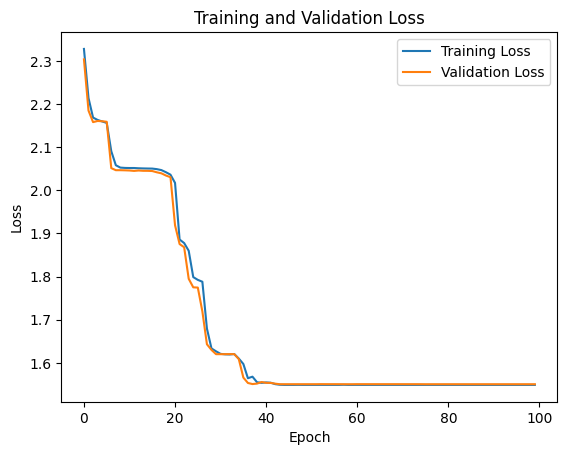

In [19]:
# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(X_train, y_train)
print('Training loss:', train_loss)
print('Training accuracy:', train_acc)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_test, y_test)
print('Validation loss:', val_loss)
print('Validation accuracy:', val_acc)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Plot the training and validation loss
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

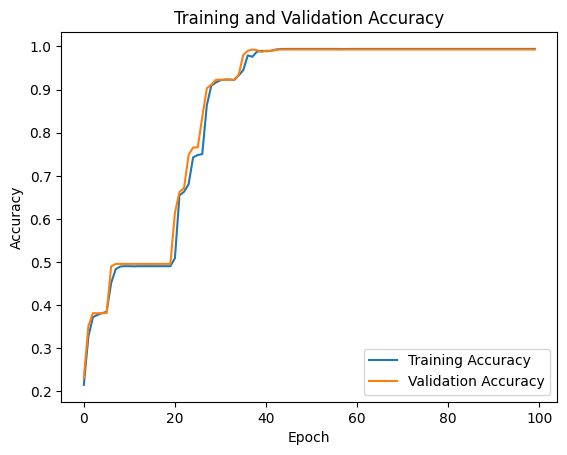

In [20]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
import tensorflow as tf
from tensorflow.keras.models import save_model, load_model

# Save the trained model
model.save('my_model.h5')

# Load the saved model
loaded_model = load_model('my_model.h5')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', ' ', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text
# Function to predict the label for a given input text
def predict_label(input_text):
    # Preprocess the input text
    preprocessed_text = preprocess_text(input_text)

    # Vectorize the preprocessed text using the same CountVectorizer used during training
    vectorized_text = vectorizer.transform([preprocessed_text])
    vectorized_text = vectorized_text.toarray()
    vectorized_text = np.expand_dims(vectorized_text, axis=2)

    # Make predictions using the loaded model
    predictions = loaded_model.predict(vectorized_text)
    predicted_label = np.argmax(predictions[0])

    return predicted_label

# Example usage
input_text = """1. This writ petition along with other similar writ petition, mentioned in the Schedule, reises a common question of law and, therefore, we propose to decide all these writ petition by a common judgment. For the convenient disposal of these writ petitions, the facts of S,B. Civil Writ petitioner No. 3324 of 1984 (Dewa Ram v. The State of Rajasthan and Ors.) are taken into consideration.

2. The petitioner Dewa Ram was appointed as a Junior Accountant by the order Annexure. I dated 27-10-87. The appointment of the petitioner was temporary in character and he was appointed for a fixed period upto February 28, 1988, the appointment was made on daily work-charge basis on the wages of Rs. 30/- per day. This period was extended upto September 30,1988, when the services of the petitioner were brought to an end vide Annexure. 2. The case of the petitioner is that he is a 'workman' within the meaning of Section 2(s) of the Industrial Disputes Act, 1947 (hereinafter referred to as 'the Act, 1947') and the Rehabilitation Section of the Collect orate, Pali, is an 'industry' within the meaning of Section 2(i) of the Act, 1947, and, therefore, the termination of the services of the petitioner amount to 'retrenchment' within the meaning of Section 2(oo) of the Act, 1947, and as the compliance of Section 25F(a) and (b) of the Act, 1947 has hot been made before terminating the services of the petitioner, therefore, the petitioner is entitled for reinstatement with full back wages. The respondents contested this position and took a stand in the reply the the petitioner was appointed by the Collector, Pali, in the Famine Relief Department. His appointment was made temporarily by the Collector, Pali, during the famine operations on daily wages basis in pursuance to the order of the Famine Relief Department, Government of Rajasthan, Jaipur, dated October 8,1987 (Annexure. R/l). The case of the respondents is that during famine operations, the Famine Relief Department of the Government of Rajasthan, in order to provide relief to the persons Jiving in drought-affected and scarcity condition was, certain vacancies like one Naib Tehsildar (Famine), one Junior Accountant and one Lower Division Clerk were sanctioned in the tehsils having more than 50% villages declared as famine-affected areas. Against these vacancies, the petitioner was initially temporarily appointed as Junior Accountant for a fixed term, i.e. till February 29,1988. The period of famine operations was extended time to time but ultimately it came to an end on September, 30,1988, when the famine relief work and the famine operations were closed. The case of the respondents, further, is that in view of Section 3 of the Rajasthan Famine Relief Work Employees (Exemption from Labour Laws) Act, 1964 (Act No. XXI of 1964) the applicability of labour laws to the famine relief works is exempted, therefore, the Act of 1947 is not applicable in the case of the petitioner.

3. We have heard the learned Counsel for the petitioner as well as the learned Additional Advocate General Shri J.P. Joshi.

4. It is contended on behalf of the petitioner that the petitioner was appointed in the Rehabilitation Department of the Pali Collectorate and therefore, the termination of the services of the petitioner amounts to retrenchment and as such before the petitioner's services could be terminated, a notice, as required Under Section 25F(a) of the Act, 1947 should have been given to the petitioner and secondly, the compensation, as required Under Section 25F(b) of the Act, 1947, as provided under this Section , should have, also, been given. As neither the notice was given nor was the compensation paid, therefore, the termination of the services of the petitioner is illegal and the petitioner is entitled for re-instatement in service with full back wages. It has, further, been contended by the learned Counsel for the petitioner that the Rajasthan Famine Relief works Employees (Exemption from Labour Laws) Act, 1964 (hereinafter referred to as 'the Act, 1964') is violative of Articles 14,16 and 21 of the Constitution of India, as it discriminates between the similarly situated persons, the same is liable to be struck-down. The contention of the learned Counsel for the petitioner is that the petitioner is doing the same work which the other like persons are doing and when the work-charge employees are entitled for the benefit of the Act of 1947, why the petitioner and other like persons, who are working in the Famine Relief Work are denied the same benefits. As a discrimination has been made between the persons similarly situated by the Act No. 21 of 1964, therefore, this Act deserves to be declared as violative of Articles 14, 16 and 21 of the Constitution of India. The learned Counsel for the petitioner, in support of his case, has placed reliance on the decision rendered by the Hon'ble Supreme Court in the case of Sanjeet Rai v. The State of Rajasthan and Ors. .

5. The learned Additional Advocate General, on the other hand, has submitted that the appointment of the petitioner was in the famine relief department and was for a fixed period and as soon as the famine work/famine operation ended, his services came to an end. As regards the validity of the Act No. 21 of 1964 is concerned, the Additional Advocate General has submitted that the Act No. 21 of 1964 is not discriminatory and is a valid piece of the legislation and has been enacted with an object to provide an exemption to the employees of the famine relief work in the State from the applicability of the Labour Law because the famine relief work is a temporary work, which has to be under taken by the State Government under special circumstances to give relief to the famine-stricken persons living in the areas which are affected by drought and scarcity conditions, and, therefore, if the exemption is granted to the famine relief work, then it cannot be said to be, in any way, discriminatory.

6. Now, we have, first, to see: whether the appointment of the petitioner was in the famine relief work or was in the Rehabilitation Section of the Collectorate, Pali?

7. Vide Annexure. R/l, the State Government, in order to provide relief to the persons living in famine-affected areas effected by drought and scarcity condition, the famine relief work was started and in order to make the payment to the workers employed in the famine relief work in a tensile, where more than 50% of the villages were drought-affected, in those tehsils at the tensile Headquarters, the posts of one Naib Tehsildar, one Lower Division Clerk and one Junior Accountant were created and sanctioned by the Famine Relief department upto February 29,1988. These posts were extended by various orders upto September 30,1988. After the creation and sanction of these posts by the State Government, vide order dated 8-10-87, the petitioner and other like persons were initially appointed as Junior Accountants on 27-11-87 upto 28-2-88 and these appointments were extended upto 30-9-88. In the letter Annexure. 1, the reference of the order dated 8-10-87 was also given. The appointment vides Annexure. 1 of the petitioner and other like persons, was, thus, made in pursuance to the order dated 8-10-87, by which these posts were created and sanctioned. All these posts were created and sanctioned for a fixed term for famine relief works, only. The posts of the Junior Accountants were created to distribute the wages to the workers employed in the famine relief work. In our view, the appointments given to the petitioner and other like persons were, thus, under the famine relief work and not in the Rehabilitation Section of the Pali Collectorate.

8. Now, we have to see: whether the Act No. XXI of 1964 is violative of Articles 14, 16 and 21 of the Constitution of India? The Rajasthan Famine Relief Work Employees (Exemption from Labour Laws) Act, 1964 was enacted with a view to provide exemption to the employees of the famine relief work in the State from the applicability of the labour laws. Section 2(b) of the Act defines 'famine relief work' as the work already started or which may hereafter to be started by the State Government to provide relief to the persons affected by the drought and scarcity conditions. Clause 2(c) provides the definition of 'labour laws' which means any of the enactment as article force in the State of Rajasthan relating to the one specified in the Schedule and in the Schedule, the Industry disputes Act, 1947, has been included at serial number 3. Section 3 provides that notwithstanding anything contained in any labour law, no such law shall be deemed to be applied to the famine relief work or to the employees working there under, in respect of any matter covered by any Section . Section 4 of the Act bars the jurisdiction of the Courts and provides that no Court shall take cognizance of any matter in respect of an employee of the famine relief works under any labour law. Section 3 of the Act, thus, specifically exempts the applicability of any labour laws including the Industrial Disputes Act, to the famine relief Work. Whether the Act is violative of Articles 14,16 and 21 of the Constitution of India or not is the question which remains for our consideration. We have, first to look into the policy and the object of the legislature. Famine Relief Work is to be started in an area where there is scarcity condition and the area is affected by drought. When the the famine operations are to be started in a particular area or not, that decision has to be taken by the State Government. The object for starting the famine operations in a particular area is to provide work to the persons in that area and to the persons affected' by the brought and scarcity conditions. While giving appointments to them, the necessary requirements or the service conditions applicable in the case of other persons are not to be taken-into consideration and a special appointment for a particular period till the famine operations are to be concluded, is to be given to the persons affected by the drought and scarcity conditions and living in that area. If in providing employment to the persons affected by the drought and scarcity conditions area, the relaxation shall be given in the service conations; rather no condition for service has been laid down and if, therefore, the exemption has been given for the applicability of the labour laws in the famine relief work employees, then, in our view, it cannot be said to be an arbitrary or irrational. While deciding: whether the provisions of the Act No. XXI of 1964' arc violative of the Article 14 or not what has to be looked-into is that the classification is based on some valid principle which itself is not irrational, unreasonable or discriminatory. Arbitrariness of the State Action is attracted only where equals are treated as 'not equals' without any valid principle, but if the classification is based on intelligible differentia, which distinguished the things from those which are left-out of the picture and if the differentia has a rationale nexus to the object sought to be achieved by the statutory persons/body, then it cannot he said to be discriminatory. In our view, in order to give relief to the areas affected by the drought and scanity conditions, famine separations are conducted and if exemption from the labour laws has been given by this Act to the applicability of the labour laws in the famine relief work, then the text of the reasonableness and rationale principle, co-related with the object sought to be achieved, arc satisfied.

9. The appointment in the famine relief work has been given only for a period upto which the famine operations are continuing in that area and not for an unlimited period. It is not a regular appointment in the regular cadre. No condition for appointment in the famine relief work has been specified. The nature of the work entrusted to the persons like the petitioner, the responsibility which goes with it and the power of jurisdiction are at variance with that of the service conditions of the other employment. The mere fact that they are performing somewhat the similar type of work will not make them at par with the workmen working on the similar posts as they have neither faced the written examination nor have they faced the interview, as the other persons in other services are required to face and as such they cannot be equated with the persons working in other departments of the respondents. Some kind of uniformity in the functions cannot equate them with the employees working in other departments of the respondents.

10. Now, taking the case cited by the learned Counsel for the petitioner, viz., Sanjeet Rai's case, the Hon'ble Supreme Court, while considering the provisions of the Act vis-a-vis Article 23 of the Constitution of India, opined that the workers employed in the famine relief work are doing the same work and, therefore, they are entitled for the minimum wages. So far as the wages-part is concerned, there is no dispute that the petitioner and like persons are also entitled for the minimum wages. But so far as the employment given to the persons in famine relief area is concerned, that is given to the persons living in the drought and scarcity affected areas in the special circumstances as a special case without taking into consideration the qualification etc. As it is a special appointment given for a particular period till the drought and scarcity conditions are over, therefore, the observations made by the Hon'ble Supreme Court in Sanjeet Rai's case are applicable only so far as the payment of wages to the workers is concerned and, in our view, it will not be applicable in the employment. The obvious reason for making the calssification in the present case is to group together those persons who arc living in the areas affected by famine and acute drought and scarcity conditions. The predominant object is to provide relief and work to such persons living in these affected areas till the drought and scarcity conditions exist, as it is a primary need for that time and this famine relief work cannot go for unlimited period. Making of such provisions, in our view, cannot be said to be arbitrary or unreasonable and according to us, there is a rational nexus with the object to be achieved. In this view of the matter, we are of the opinion that the Rajasthan Famine Relief Work Employees (Exemption from Labour Laws) Act, 1964, is not violative of Articles 14,16 and 21 of the constitution of India.

11. Consequently, we do not find any merit in this writ petition and the writ petitions, mentioned in the Schedule and the present writ petition are, therefore, dismissed. No order as to costs."""
predicted_label = predict_label(input_text)
print("Predicted Label:", predicted_label)


1/1 [==============================] - 0s 99ms/step
Predicted Label: 2
